In [19]:
from matplotlib import pyplot as plt

In [12]:
conda install -c menpo opencv3

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - opencv3 -> python[version='2.7.*|3.4.*|3.5.*']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your 

In [38]:
import cv2

In [2]:
cv2.__version__

'4.5.5'

In [44]:
from sklearn.datasets import fetch_lfw_people

In [45]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [518]:
faces.data.shape

(1348, 2914)

In [589]:
img2 = faces.images[0]
img2.shape

(62, 47)

In [592]:
img2[0,0]

138.0

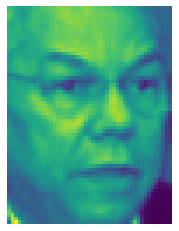

In [585]:
img = plt.imshow(img.reshape(62,47))
plt.axis('off');

In [586]:
from PIL import Image

In [642]:
imgg = Image.fromarray(img2)
imgg.mode

'F'

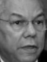

In [647]:
imgg.convert('RGB')

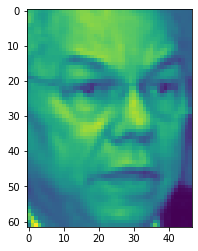

In [602]:
plt.imshow(img2)

# Loading Images

In [663]:
image = cv2.imread("images/animal.jpeg", cv2.IMREAD_GRAYSCALE)

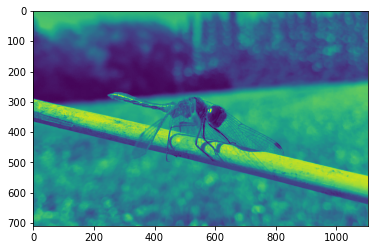

In [567]:
plt.imshow(image)

In [634]:
imgg = Image.fromarray(image)
imgg.mode

'L'

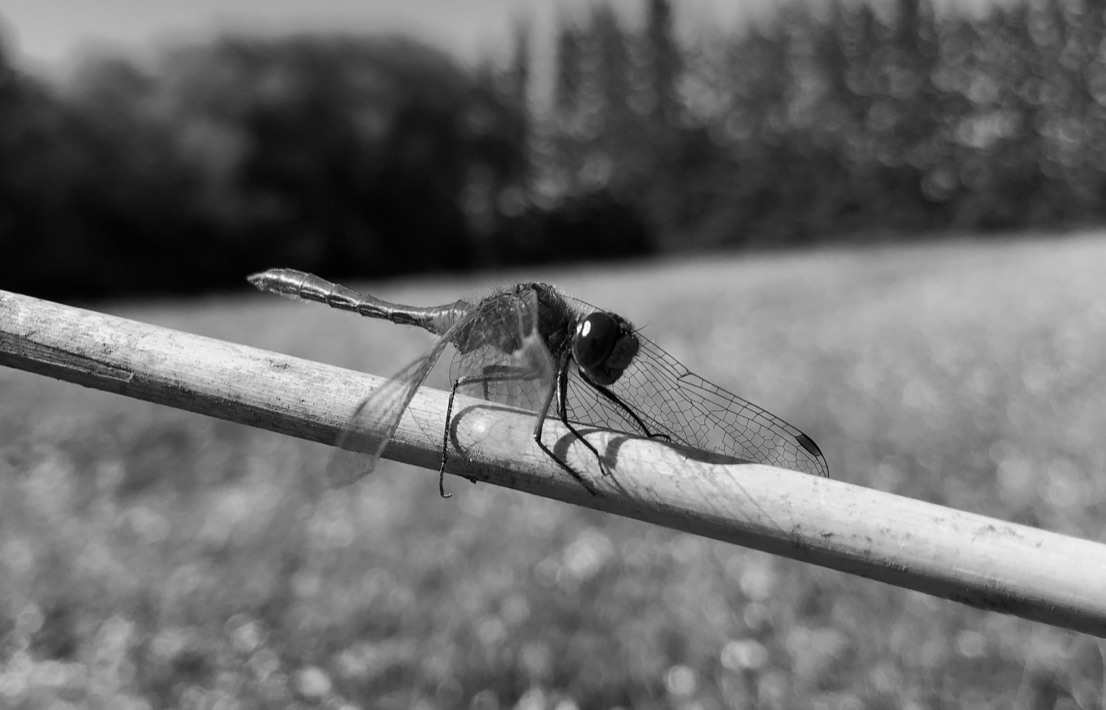

In [666]:
imgg.convert('L')

In [81]:
image.shape

(710, 1106)

In [82]:
image[0,0]

176

In [385]:
image2 = cv2.imread("images/animal.jpeg", cv2.IMREAD_COLOR)

In [386]:
image2[0,0]

array([249, 184, 133], dtype=uint8)

In [387]:
image2_ = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [631]:
imgg = Image.fromarray(image2_)
imgg.mode

'RGB'

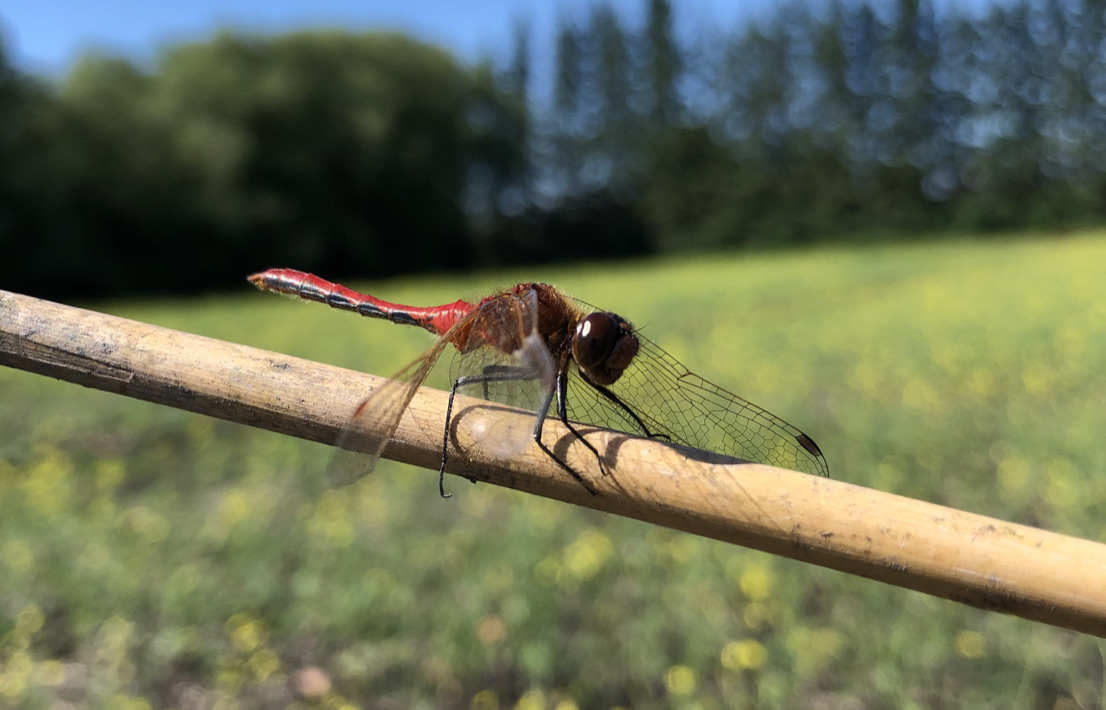

In [632]:
imgg.convert('RGB')

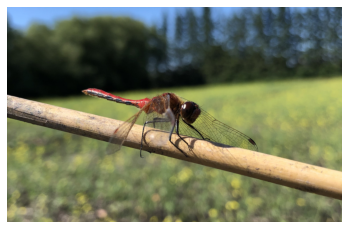

In [388]:
plt.imshow(image2_)
plt.axis('off');

In [591]:
image2_[0,0]

array([133, 184, 249], dtype=uint8)

# Saving Images

In [661]:
cv2.imwrite("images/animal_new.jpeg", image2)

True

# Resizing Images

In [389]:
resize =cv2.resize(image2_, (50,50))

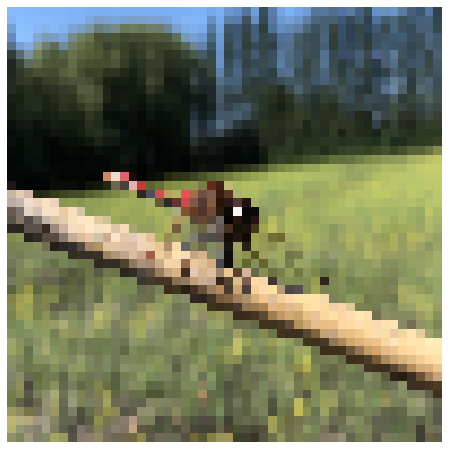

In [390]:
plt.imshow(resize)
plt.axis('off');
fig = plt.gcf()
fig.set_size_inches(15,8)

# Cropping Images

In [658]:
image.shape

(710, 1106)

In [659]:
cropped = image[:,:700]

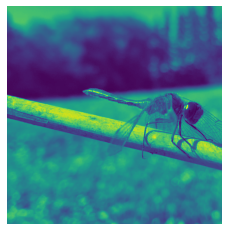

In [121]:
plt.imshow(cropped)
plt.axis('off');

In [395]:
cropped2 = image2_[:,:700,:]

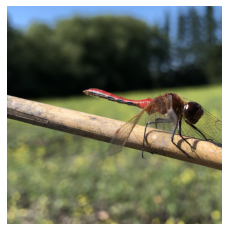

In [396]:
plt.imshow(cropped2,cmap='bone')
plt.axis('off');

# Blurring Images

In [398]:
blurry = cv2.blur(image2_, (20,20))

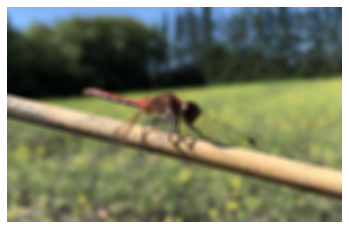

In [399]:
plt.imshow(blurry, cmap='bone')
plt.axis('off');

In [434]:
kernel = np.ones((6,6))/25

In [435]:
image_kernel = cv2.filter2D(image2_, -1, kernel)

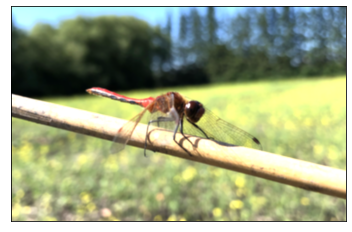

In [436]:
plt.imshow(image_kernel, cmap='gray')
plt.xticks([])
plt.yticks([]);

# Sharpening Images

In [445]:
kernel = np.array([[0, -1, 0],[-1, 5,-1], [0, -1, 0]])

In [446]:
shapen = cv2.filter2D(image2_, -1, kernel)

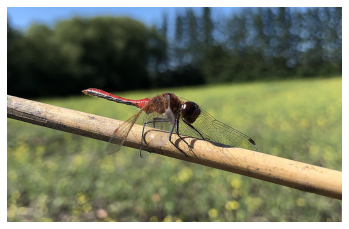

In [447]:
plt.imshow(shapen, cmap='gray')
plt.axis('off');

# Enhancing Contrast

In [449]:
enhance = cv2.equalizeHist(image)

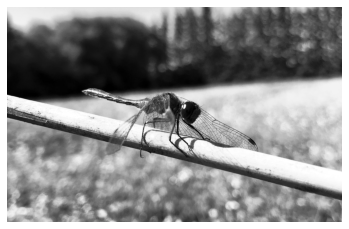

In [450]:
plt.imshow(enhance, cmap='gray')
plt.axis('off');

In [672]:
image2_yuv = cv2.cvtColor(image2_, cv2.COLOR_BGR2YUV)

In [673]:
image2_yuv[:,:,0] = cv2.equalizeHist(image2_yuv[:,:,0])

In [674]:
image2_bgr = cv2.cvtColor(image2_yuv, cv2.COLOR_YUV2BGR)

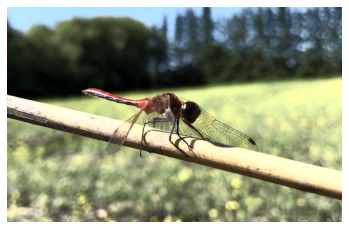

In [675]:
plt.imshow(image2_bgr)
plt.axis('off');

# Isolating Colors

In [255]:
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

In [256]:
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

In [257]:
mask = cv2.inRange(image2_hsv, lower_blue, upper_blue)
image2_bgr_masked = cv2.bitwise_and(image2, image2, mask=mask)

In [260]:
image2_ = cv2.cvtColor(image2_bgr_masked, cv2.COLOR_BGR2RGB)

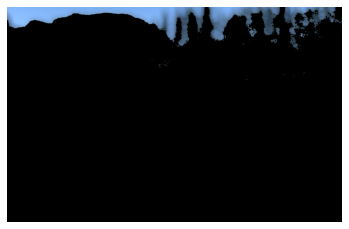

In [263]:
plt.imshow(image2_)
plt.axis('off');

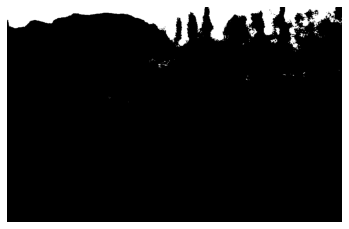

In [267]:
plt.imshow(mask, cmap='gray')
plt.axis('off');

# Binarizing Images

In [283]:
max_output_value = 255 
neighborhood_size = 99 
subtract_from_mean = 10 
image_binarized = cv2.adaptiveThreshold(image,
max_output_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, neighborhood_size, subtract_from_mean)

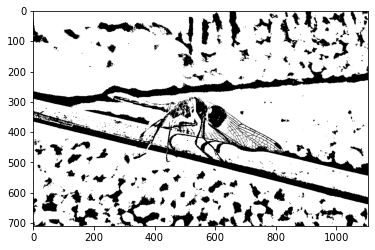

In [286]:
plt.imshow(image_binarized, cmap='gray')

In [280]:
image_mean_threshold = cv2.adaptiveThreshold(image, max_output_value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, neighborhood_size, subtract_from_mean)

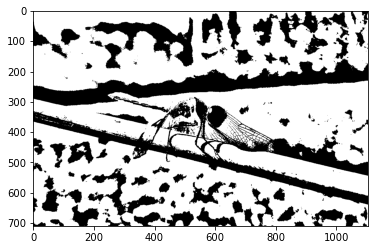

In [287]:
plt.imshow(image_mean_threshold, cmap='gray')

# Detecting Edges

In [288]:
median_intensity = np.median(image)

In [289]:
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity)) 
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

In [290]:
image_canny = cv2.Canny(image, lower_threshold, upper_threshold)

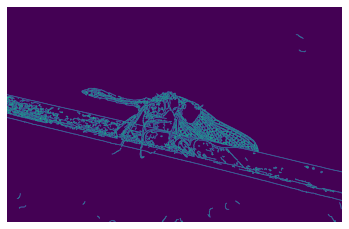

In [293]:
plt.imshow(image_canny)
plt.axis('off');

# Detecting Corners

In [299]:
image_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) 

In [310]:
image_gray = np.float32(image_gray)

In [311]:
block_size = 2 
aperture = 29 
free_parameter = 0.04
detector_responses = cv2.cornerHarris(image_gray,block_size, aperture, free_parameter)
detector_responses = cv2.dilate(detector_responses, None)

In [313]:
threshold = 0.02 
image2[detector_responses > threshold * detector_responses.max()] = [255,255,255]
image_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

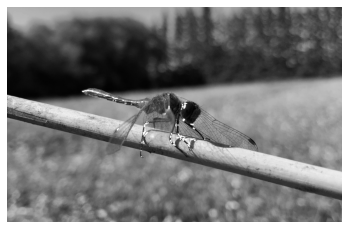

In [314]:
plt.imshow(image_gray, cmap="gray"), 
plt.axis("off") 
plt.show()

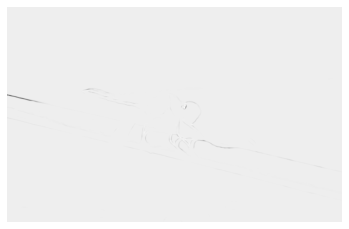

In [315]:
plt.imshow(detector_responses, cmap='gray'), 
plt.axis("off") 
plt.show()

# Creating Features for Machine Learning

In [413]:
image_resize = cv2.resize(image2_, (120,80))

In [414]:
image_resize.shape

(80, 120, 3)

In [415]:
image_resize.flatten()

array([134, 185, 251, ..., 106, 108,  80], dtype=uint8)

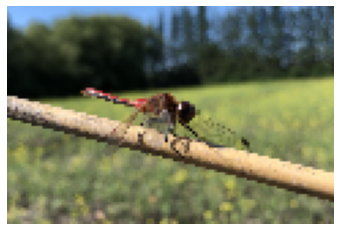

In [416]:
plt.imshow(image_resize, cmap='gray')
plt.axis('off');

In [366]:
image.flatten().shape

(785260,)

In [676]:
image2_resize = cv2.resize(image, (120,80))

In [677]:
image2_resize.shape

(80, 120)

In [678]:
image2_resize.flatten().shape

(9600,)

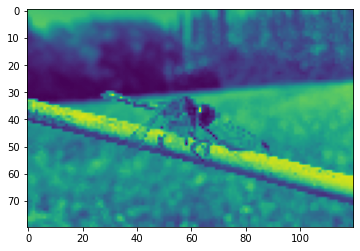

In [679]:
plt.imshow(image2_resize)

In [368]:
image2.flatten().shape

(2355780,)

# Encoding Mean Color as a Feature

In [417]:
channels = cv2.mean(image2_)

In [418]:
observations = np.array([channels[1], channels[0], channels[2]])

In [419]:
observations

array([111.72896111, 106.29355118,  84.1892265 ])

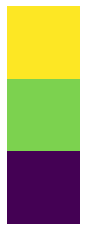

In [420]:
plt.imshow(observations[:,None])
plt.axis('off');

# Encoding Color Histograms as Features

In [379]:
image2_ .shape

(710, 1106, 3)

In [452]:
features = []

In [453]:
colors = ("r","g","b")

In [461]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image2_], # Image
                             [i], # Index of channel
                             None,
                             [256], # Histogram size 
                             [0,256]) # Range features.extend(histogram)
    features.extend(histogram)
    

In [465]:
np.array(features).flatten().shape

(768,)

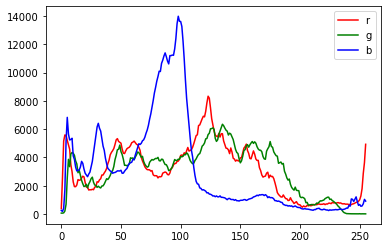

In [489]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image2_], # Image
                             [i], # Index of channel
                             None,
                             [256], # Histogram size 
                             [0,256])# Range features.extend(histogram)
    plt.plot(histogram, color=channel, label=channel)
    plt.legend()